Q: Generate a simulated data set as follows:

set.seed(1)
x = rnorm(100)
y = x - 2*x^2 + rnorm (100)

In this data set, what is n and what is p ? Write out the model used to generate the data in equation form.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut


np.random.seed(1)
X = np.random.normal(size=100)
y = X - 2 * X**2 + np.random.normal(size=100)

print("y", y)
print("x", X)

y [-4.09977892e+00 -1.35740528e-01 -6.82610910e-01 -2.78191343e+00
 -1.72736495e+00 -1.27263170e+01 -3.60336797e+00 -2.87377939e+00
 -1.50751300e-01 -3.41126997e-01 -4.18652862e+00 -1.02333408e+01
  3.15837737e-01 -1.53856579e+00 -1.08655088e+00 -4.83169628e+00
 -2.70586690e-01 -4.03490158e+00  1.16006745e+00  3.12368605e-01
 -3.54796128e+00 -2.25122265e+00  5.49614996e-01  1.96459497e+00
 -2.58020880e+00 -3.82531400e-01  1.47455651e+00 -2.34908661e+00
 -1.61068416e+00  8.31146942e-01 -1.82937024e+00 -1.31550088e+00
 -2.86164348e+00 -1.72341330e+00 -7.79582001e-01 -6.36516113e-01
 -3.09349884e+00 -1.01982713e+00 -3.04822333e+00 -3.12647613e-01
 -4.52007083e-01 -2.56514519e+00 -9.94763169e-01 -3.28593891e+00
  5.75110223e-01 -1.31082134e+00  1.95839168e-01 -6.10350788e+00
  3.23777164e-01  5.37875159e-01 -1.90150896e-01 -3.03524752e+00
 -2.71438926e+00  1.59355625e+00  1.45196609e-01 -2.01785579e-01
 -7.05247668e-01 -9.21854278e-01  1.39876493e-01 -1.80382733e+00
 -2.40972491e+00 -2.883

Q: Create a scatterplot of X against Y . Comment on what you find.

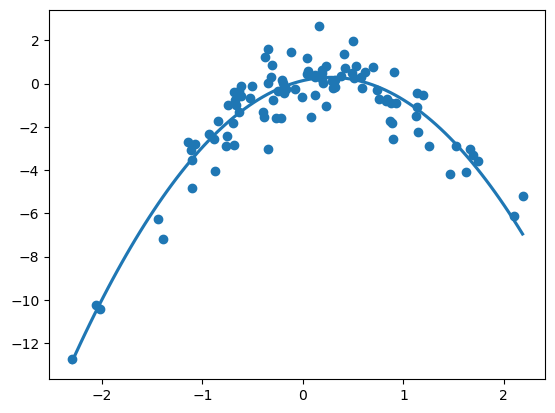

In [2]:
plt.scatter(X, y)
sns.regplot(x = X, y = y, order = 2, ci = None, scatter=False)
plt.show()

I have fit a least squares linear model (with a quadratic term for X
) to the data, and we can see that the fitted model fits the data (and what we would expect from the underlying relationship) very well.

Q: Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

i.Y=β0+β1X+ϵ

ii.Y=β0+β1X+β2X2+ϵ

iii.Y=β0+β1X+β2X2+β3X3+ϵ

iv.Y=β0+β1X+β2X2+β3X3+β4X4+ϵ

Note you may find it helpful to use the data.frame() function to create a single data set containing both X and Y.

In [3]:
df = pd.DataFrame({"X": X, "y": y})

def LOOCV(df, formula):
    model = sm.GLM.from_formula(formula, data=df, family=sm.families.Gaussian())
    model_fit = model.fit()
    residuals = (df["y"] - model_fit.predict()) / (1 - model_fit.get_influence().hat_matrix_diag)
    loocv_mse = np.mean(residuals**2)
    return loocv_mse

formula = "y ~ X + I(X**2)"
loocv_result = LOOCV(df, formula)

print("LOOCV_MSE:", loocv_result)

LOOCV_MSE: 0.9142897072803661


In [4]:
#i

rounded_lr = round((LOOCV(df, "y ~ X")), 3)

print(rounded_lr)

6.261


In [5]:
#ii

rounded_lr = round(LOOCV(df, "y ~ X + I(X**2)"), 3)

print(rounded_lr)

0.914


In [6]:
#iii

rounded_lr= round(LOOCV(df, "y ~ X + I(X**2) + I(X**3)"), 3)

print(rounded_lr)

0.927


In [7]:
#iv

rounded_lr= round(LOOCV(df, "y ~ X + I(X**2) + I(X**3) + I(X**4)"), 3)

print(rounded_lr)

0.867


Q: Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?


In [8]:
np.random.seed(2)

X = np.random.normal(size=100)
y = X - 2 * X**2 + np.random.normal(size=100)

df = pd.DataFrame({"X": X, "y": y})

rounded_lr = round((LOOCV(df, "y ~ X")), 3)

print(rounded_lr)

11.61


In [9]:
rounded_lr = round(LOOCV(df, "y ~ X + I(X**2)"), 3)

print(rounded_lr)

1.265


In [10]:
rounded_lr= round(LOOCV(df, "y ~ X + I(X**2) + I(X**3)"), 3)

print(rounded_lr)

1.282


In [11]:
rounded_lr= round(LOOCV(df, "y ~ X + I(X**2) + I(X**3) + I(X**4)"), 3)

print(rounded_lr)

1.317


A: Changing the random seed that is used to simulate the observations has an effect on the observed mean squared error.

In changing the random seed, we have changed the sample of observations taken from the population, so this change in error is due to variance in our sample. In this case, the sample size in is small n=100, and so we might expect quite hi high variance between successive samples. This would lead to variability between the MSE errors observed for different samples of X, Y.

Q: Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

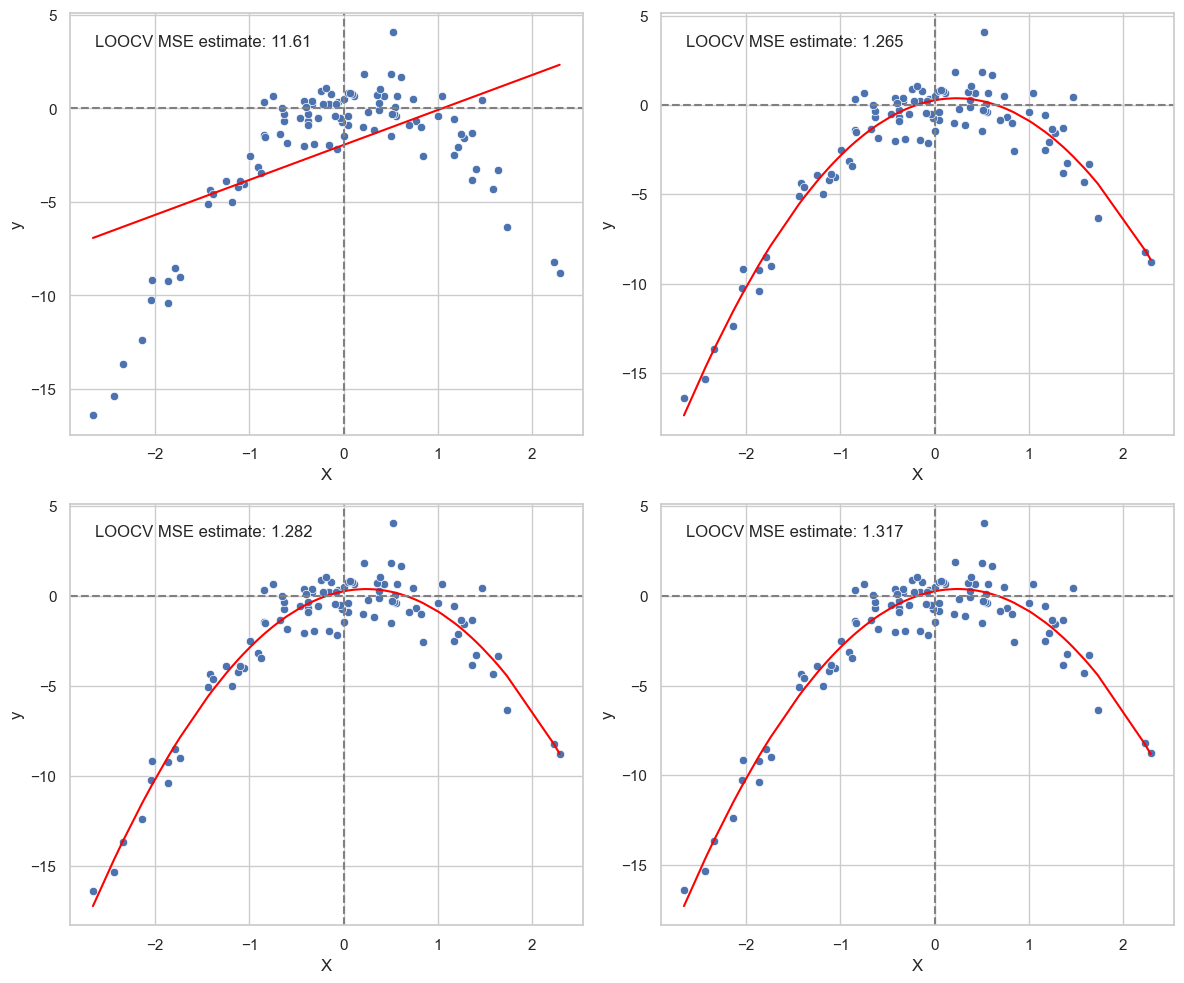

In [14]:
orders = [1, 2, 3, 4]
loocv_results = []

for order in orders:
    formula = f"y ~ {' + '.join(['I(X**' + str(i) + ')' for i in range(1, order + 1)])}"
    loocv_result = LOOCV(df, formula)
    loocv_results.append(loocv_result)

# Configurar estilo de seaborn
sns.set(style="whitegrid")

# Crear subgráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, order in enumerate(orders):
    formula = f"y ~ {' + '.join(['I(X**' + str(j) + ')' for j in range(1, order + 1)])}"
    model = sm.GLM.from_formula(formula, data=df, family=sm.families.Gaussian())
    model_fit = model.fit()
    title = f"Fit: y ~ {' + '.join(['X^' + str(j) for j in range(1, order + 1)])}"
    subtitle = f"LOOCV MSE estimate: {round(loocv_results[i], 3)}"
    
    sns.scatterplot(x="X", y="y", data=df, ax=axes[i])
    sns.lineplot(x=df["X"], y=model_fit.predict(), color="red", ax=axes[i])
    axes[i].axhline(y=0, color="grey", linestyle="--")
    axes[i].axvline(x=0, color="grey", linestyle="--")
    axes[i].text(0.05, 0.95, subtitle, transform=axes[i].transAxes, va="top")

plt.tight_layout()
plt.show()